In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
insurance=pd.read_csv(r'C:\Users\harshal gidh\Desktop\Python\HandsOn\new_insurance_data\new_insurance_data.csv')

In [3]:
insurance


,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [4]:
 insurance.shape

(1338, 13)

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [6]:
insurance.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

#prefer median to replace null values instead of mean as mean is influenced by outliers and skewness will chnage mean's value

If dataset is small dropping columns would affect the data. If 50% of data is null we can drop 

In [7]:
insurance.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [8]:
col=list(insurance.columns)

In [9]:
col


['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [10]:
insurance['smoker'].mode()[0]

'no'

In [11]:
insurance['age'].mean()

39.31000752445448

In [12]:
#filling null with values
for col_name in col:
    if insurance[col_name].dtype=='object' :
        insurance[col_name]=insurance[col_name].fillna(insurance[col_name].mode()[0])
    else :
        insurance[col_name]=insurance[col_name].fillna(insurance[col_name].median())

In [13]:
insurance.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [14]:
insurance.shape

(1338, 13)

'''
*load the data 
*EDA(SHAPE,info,cleanup,...etc)
*feature engineering
*feature selection
*model building
*prediction
*model evaluation
'''

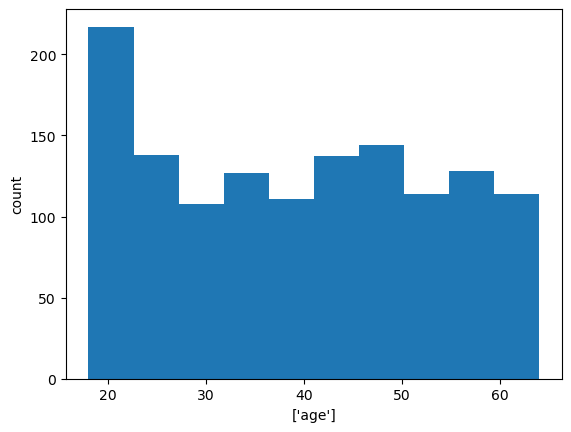

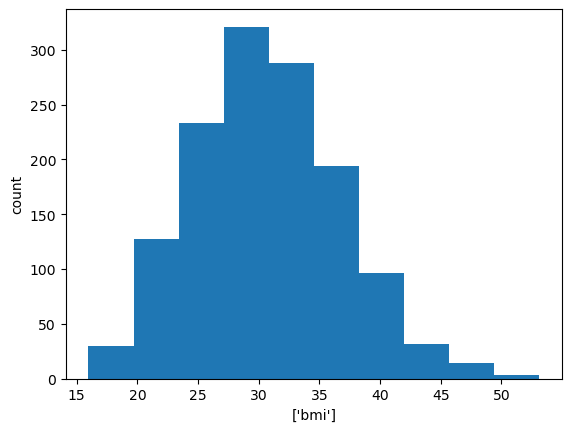

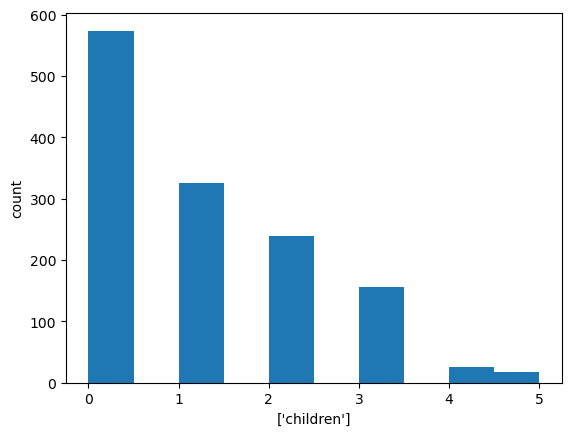

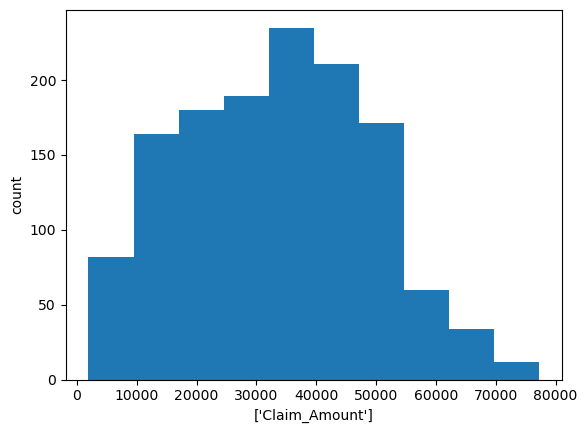

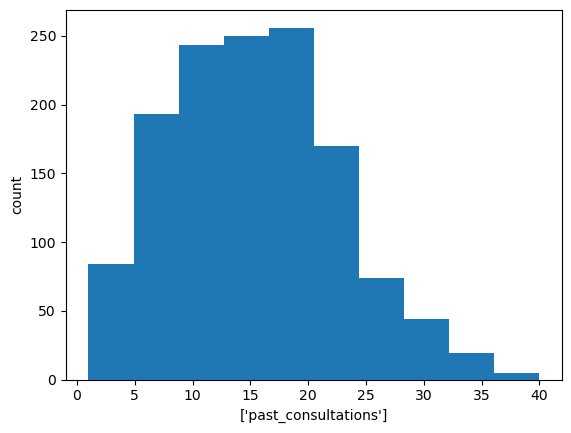

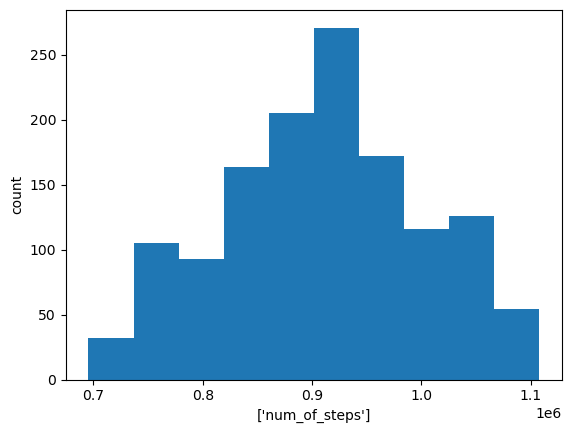

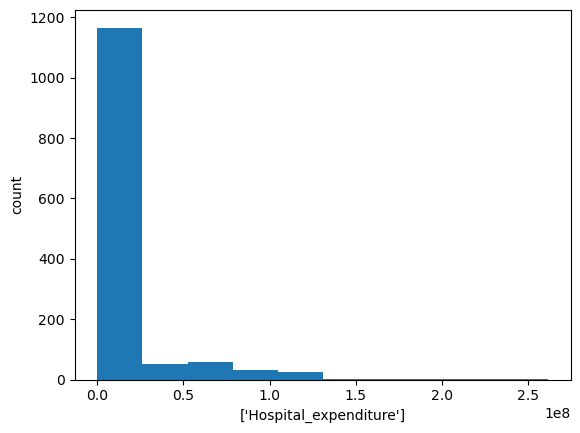

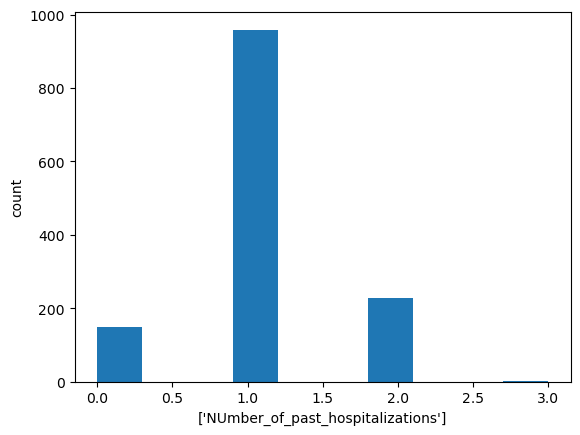

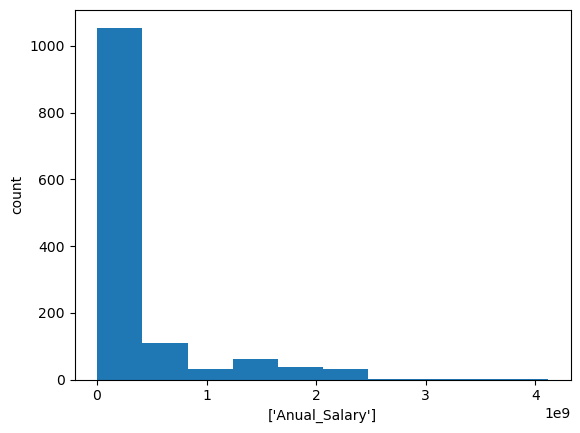

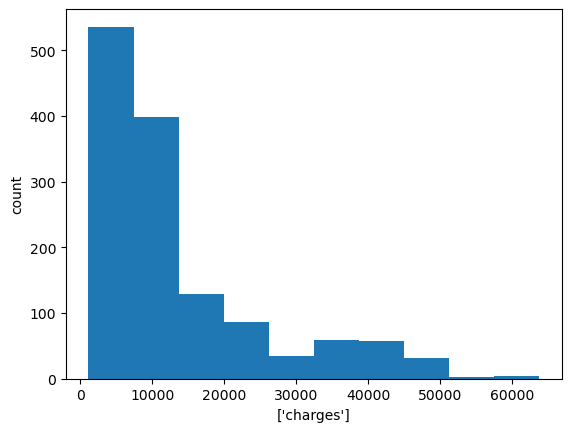

In [15]:
for col_name in col:
    if (insurance[col_name].dtype=='int' or insurance[col_name].dtypes=='float'):
        plt.hist(insurance[col_name])
        plt.xlabel([col_name])
        plt.ylabel('count')
        plt.show()

In [16]:
insurance.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1.338000e+03,1.338000e+03,1338.000000,1.338000e+03,1338.000000
mean,39.307922,30.664518,1.090433,33364.874093,15.215247,9.100143e+05,1.581682e+07,1.060538,3.686636e+08,13270.422265
std,13.987523,6.094853,1.199619,15535.345575,7.450962,9.178320e+04,2.665699e+07,0.533189,5.658157e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.315000,0.000000,20947.645198,9.000000,8.474898e+05,4.084941e+06,1.000000,7.755085e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.656250,2.000000,44978.873188,20.000000,9.715100e+05,1.082630e+07,1.000000,3.225202e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


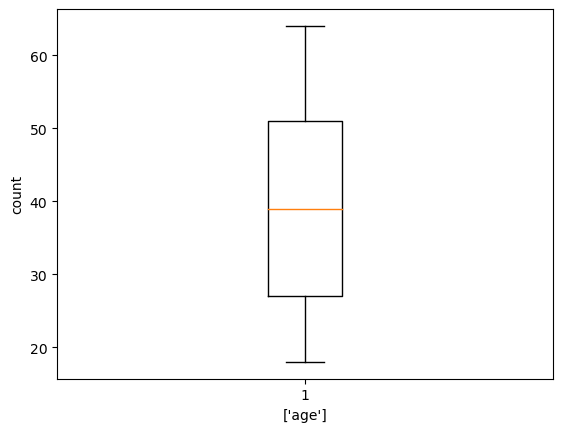

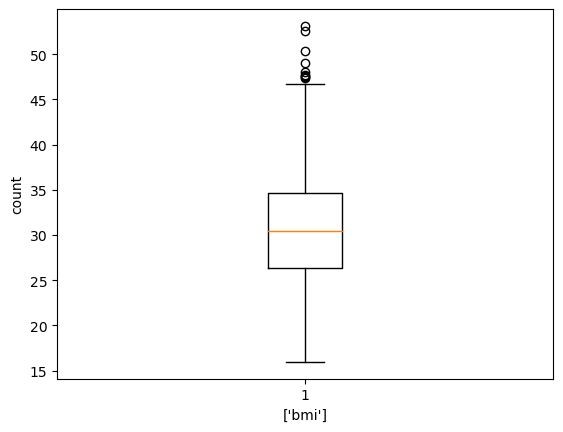

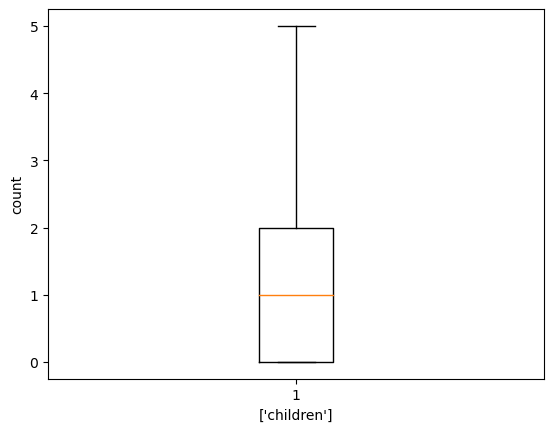

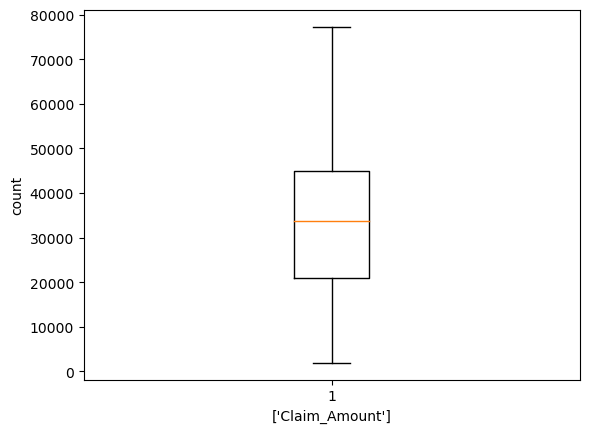

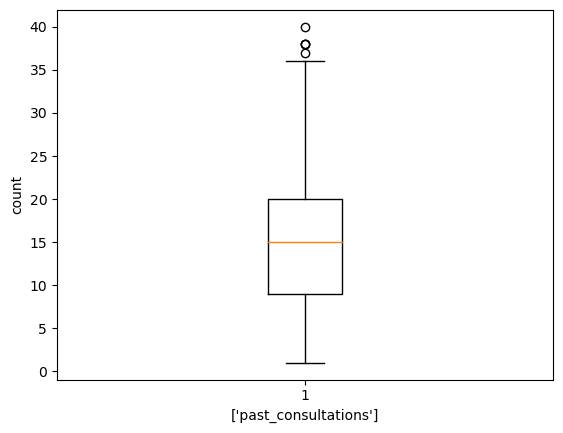

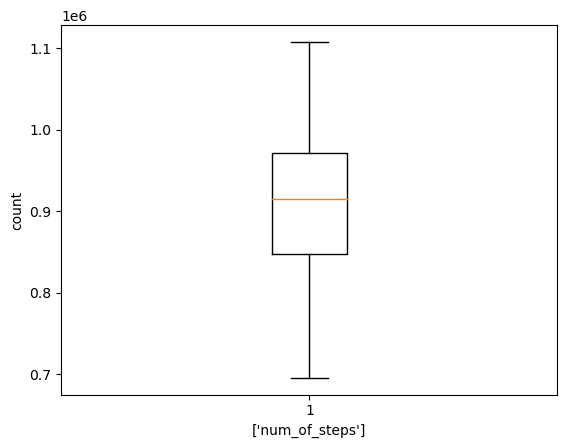

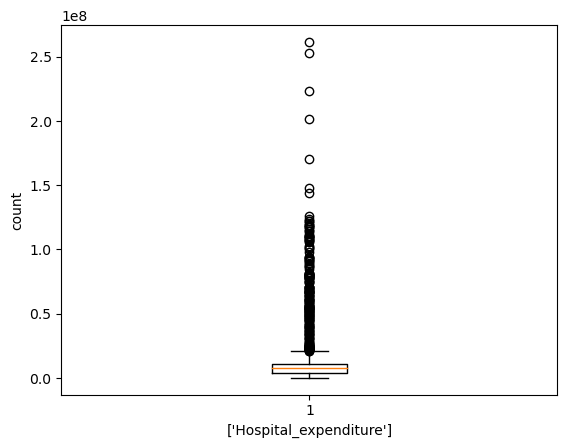

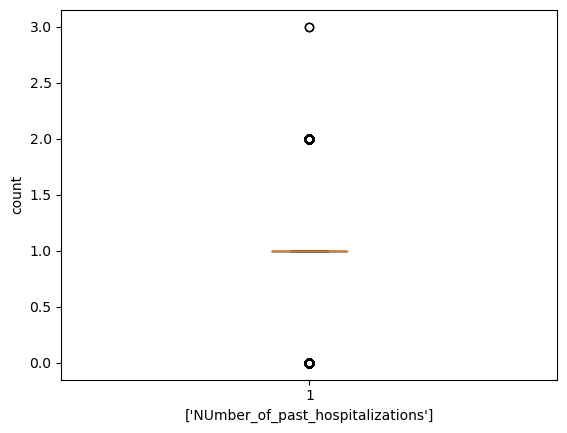

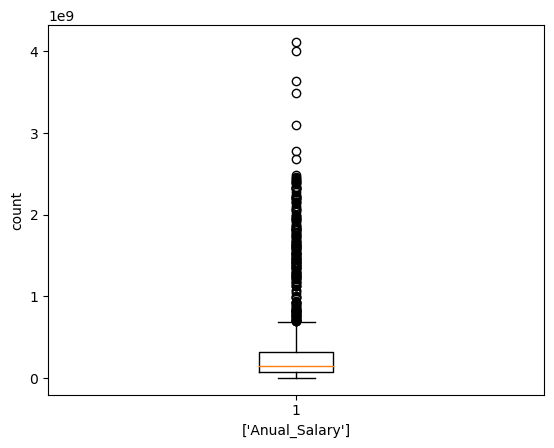

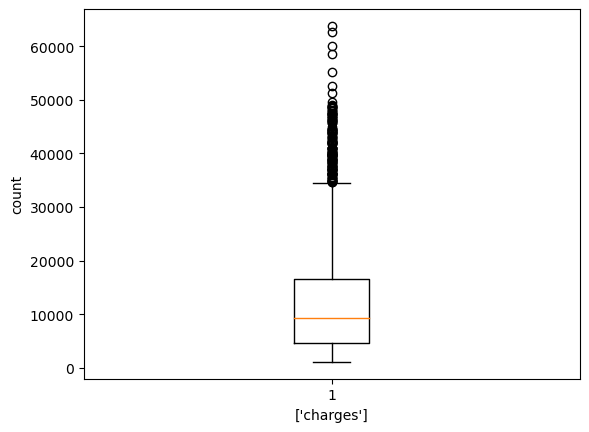

In [17]:
for col_name in col:
    if (insurance[col_name].dtype=='int' or insurance[col_name].dtypes=='float'):
        plt.boxplot(insurance[col_name])
        plt.xlabel([col_name])
        plt.ylabel('count')
        plt.show()

#Box plot and Violin PLOT easily shows us the outliears in the data

In [18]:
#To calculate outliers in data :
def outlier(data):
    outlier=[]
    mean=np.mean(data)
    std=np.std(data)
    threshold=3.5
    for i in data:
        z=(i-mean)/std
        if np.abs(z)>threshold:
            outlier.append(i)
    return outlier
        

In [19]:
outlier(insurance['Hospital_expenditure'])

[110173769.6,
 111796732.7,
 114344017.9,
 109928933.7,
 109975780.5,
 114566438.4,
 110586401.9,
 110104228.6,
 117360056.6,
 118519793.9,
 115677571.2,
 118966096.6,
 119144055.3,
 117046461.1,
 120402998.3,
 122180043.2,
 122405879.8,
 126353660.6,
 123627927.0,
 144061589.9,
 148034634.6,
 170380500.5,
 201515184.8,
 223644981.3,
 252892382.6,
 261631699.3]

In [20]:
insurance.corr()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.112174,0.041710,0.122873,0.168479,0.513066,0.137208,0.359637,0.163478,0.293735
bmi,0.112174,1.000000,0.007790,0.093447,0.130701,0.135994,0.256924,0.137115,0.241550,0.198745
children,0.041710,0.007790,1.000000,0.041607,0.054806,0.163478,0.025315,0.185546,0.041260,0.070877
Claim_Amount,0.122873,0.093447,0.041607,1.000000,0.271526,0.398285,0.369988,0.379923,0.404026,0.435671
past_consultations,0.168479,0.130701,0.054806,0.271526,1.000000,0.559692,0.542150,0.500145,0.589292,0.627598
num_of_steps,0.513066,0.135994,0.163478,0.398285,0.559692,1.000000,0.624790,0.844983,0.733622,0.889753
Hospital_expenditure,0.137208,0.256924,0.025315,0.369988,0.542150,0.624790,1.000000,0.651827,0.957189,0.871796
NUmber_of_past_hospitalizations,0.359637,0.137115,0.185546,0.379923,0.500145,0.844983,0.651827,1.000000,0.735802,0.820682
Anual_Salary,0.163478,0.241550,0.041260,0.404026,0.589292,0.733622,0.957189,0.735802,1.000000,0.946398
charges,0.293735,0.198745,0.070877,0.435671,0.627598,0.889753,0.871796,0.820682,0.946398,1.000000


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
from sklearn.model_selection import train_test_split

Variation Infaltion Factor(VIF) removes multi-correlation between columns and gives independent variables

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
col_list=[]
for col in insurance.columns:
    if ((insurance[col].dtypes!='object') & (col!='charges')):
        col_list.append(col)

In [31]:
col_list


['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [32]:
X=insurance[col_list]

In [33]:
X

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
0,18.0,23.210,0.0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07
1,18.0,30.140,0.0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07
2,18.0,33.330,0.0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07
3,18.0,33.660,0.0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07
4,18.0,34.100,0.0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07
...,...,...,...,...,...,...,...,...,...
1333,33.0,35.530,0.0,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09
1334,31.0,38.095,1.0,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09
1335,52.0,34.485,3.0,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09
1336,45.0,30.360,0.0,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09


In [34]:
X.values


array([[1.80000000e+01, 2.32100000e+01, 0.00000000e+00, ...,
        4.72092099e+06, 0.00000000e+00, 5.57849700e+07],
       [1.80000000e+01, 3.01400000e+01, 0.00000000e+00, ...,
        4.32983168e+06, 0.00000000e+00, 1.37008852e+07],
       [1.80000000e+01, 3.33300000e+01, 0.00000000e+00, ...,
        6.88486077e+06, 0.00000000e+00, 7.35231073e+07],
       ...,
       [5.20000000e+01, 3.44850000e+01, 3.00000000e+00, ...,
        2.23644981e+08, 2.00000000e+00, 3.64080668e+09],
       [4.50000000e+01, 3.03600000e+01, 0.00000000e+00, ...,
        2.52892383e+08, 3.00000000e+00, 4.00635850e+09],
       [5.40000000e+01, 4.74100000e+01, 0.00000000e+00, ...,
        2.61631699e+08, 3.00000000e+00, 4.11719664e+09]])

In [39]:
def VIF(insurance):
    col_list=[]
    for col in insurance.columns:
        if ((insurance[col].dtypes!='object') & (col!='charges')):
            col_list.append(col)
    X=insurance[col_list]
    vif_data=pd.DataFrame()
    vif_data['feature']=X.columns
    vif_data['vif']=[variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
    print(vif_data)
VIF(insurance)

                           feature        vif
0                              age  10.151158
1                              bmi  11.688356
2                         children   1.931368
3                     Claim_Amount   6.375028
4               past_consultations   7.536986
5             Hospital_expenditure  17.571109
6  NUmber_of_past_hospitalizations  13.750606
7                     Anual_Salary  23.592163


In [37]:
insurance=insurance.drop(['num_of_steps'],axis=1)

In [40]:
insurance=insurance.drop(['Anual_Salary'],axis=1)

In [41]:
VIF(insurance)

                           feature        vif
0                              age   9.909001
1                              bmi  11.145846
2                         children   1.917639
3                     Claim_Amount   6.362642
4               past_consultations   7.338140
5             Hospital_expenditure   2.546587
6  NUmber_of_past_hospitalizations  11.048809


In [42]:
insurance=insurance.drop(['bmi'],axis=1)

In [43]:
VIF(insurance)

                           feature        vif
0                              age   7.508435
1                         children   1.890687
2                     Claim_Amount   5.660365
3               past_consultations   6.708699
4             Hospital_expenditure   2.515995
5  NUmber_of_past_hospitalizations  11.029632


In [44]:
insurance=insurance.drop(['NUmber_of_past_hospitalizations'],axis=1)

In [45]:
VIF(insurance)

                feature       vif
0                   age  5.809884
1              children  1.783669
2          Claim_Amount  5.349778
3    past_consultations  6.290878
4  Hospital_expenditure  1.886956


In [46]:
insurance=insurance.drop(['past_consultations'],axis=1)

In [47]:
VIF(insurance)

                feature       vif
0                   age  4.471810
1              children  1.757327
2          Claim_Amount  4.838302
3  Hospital_expenditure  1.554467


In [48]:
x=insurance.loc[:,['age','children','Claim_Amount','Hospital_expenditure']]
y=insurance['charges']
x

,age,children,Claim_Amount,Hospital_expenditure
0,18.0,0.0,29087.54313,4.720921e+06
1,18.0,0.0,39053.67437,4.329832e+06
2,18.0,0.0,39023.62759,6.884861e+06
3,18.0,0.0,28185.39332,4.274774e+06
4,18.0,0.0,14697.85941,3.787294e+06
...,...,...,...,...
1333,33.0,0.0,63142.25346,1.703805e+08
1334,31.0,1.0,43419.95227,2.015152e+08
1335,52.0,3.0,52458.92353,2.236450e+08
1336,45.0,0.0,69927.51664,2.528924e+08


In [49]:
y

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1333    55135.40209
1334    58571.07448
1335    60021.39897
1336    62592.87309
1337    63770.42801
Name: charges, Length: 1338, dtype: float64

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
#random_state=0 means that it fixes the internal random generator used for sampling the data for training and testing purposes
#If it is fixed the accuracy of the model will remain same 

In [63]:
x_train

,age,children,Claim_Amount,Hospital_expenditure
560,45.0,0.0,29622.26103,7.579867e+06
1285,44.0,0.0,66824.70947,8.042196e+07
1142,50.0,0.0,36320.75384,1.772151e+07
969,63.0,0.0,24827.43078,1.214312e+07
486,34.0,3.0,47348.03370,6.034962e+06
...,...,...,...,...
1095,59.0,0.0,47554.34106,1.132722e+07
1130,46.0,0.0,63672.07916,2.295519e+07
1294,54.0,2.0,42578.49702,9.188836e+07
860,58.0,0.0,27369.02461,3.634140e+06


In [64]:
y_train

560      7731.85785
1285    42983.45850
1142    25656.57526
969     14449.85440
486      6753.03800
           ...     
1095    21797.00040
1130    24603.04837
1294    44260.74990
860     12235.83920
1126    24476.47851
Name: charges, Length: 1070, dtype: float64

In [65]:
x_test

,age,children,Claim_Amount,Hospital_expenditure
764,54.0,1.0,41178.474530,6.906061e+06
887,60.0,0.0,55587.429360,1.062849e+07
890,44.0,0.0,8819.797107,6.113974e+06
1293,47.0,2.0,46520.247900,9.420315e+07
259,22.0,2.0,48614.570180,8.850428e+06
...,...,...,...,...
109,22.0,0.0,33257.707940,4.589846e+06
575,47.0,1.0,42904.689350,5.825061e+06
535,41.0,2.0,51973.371980,8.454802e+06
543,45.0,0.0,9922.222111,5.802739e+06


In [66]:
y_test

764     10928.84900
887     12648.70340
890     12797.20962
1293    44202.65360
259      3925.75820
           ...     
109      2154.36100
575      8062.76400
535      7371.77200
543      7448.40395
846     12029.28670
Name: charges, Length: 268, dtype: float64

In [67]:
l_model=LinearRegression()

In [68]:
l_model.fit(x_train,y_train)

LinearRegression()

In [69]:
predictions=l_model.predict(x_test)

In [70]:
predictions

array([12947.97941169, 16087.46705223,  7576.55058649, 44196.31760373,
       10295.4537807 , 52777.22384612, 14809.78429913, 10455.67736844,
       38645.48210852, 11496.08471941,  9544.49747813, 10520.22924478,
        2950.18796756,  7905.53445307, 10917.59328191,  9377.0910617 ,
        8277.11544622, 14521.17818249,  6188.44655271, 12736.55759139,
        8123.32737723, 13025.87731353, 11888.4047947 ,  7073.23958644,
       16292.40366936,  6716.78679949, 10779.15162807,  9907.27528071,
        6575.15309992, 11942.40466669, 31685.80289124, 12961.70944546,
        7875.14893542, 16490.54261826, 17674.11574273, 13711.43664293,
        9466.6804406 , 30564.2183394 , 25569.85130825,  6155.59212828,
        6253.74462205,  9442.4342714 , 15291.0354287 ,  7924.21355202,
       11270.34865536,  7192.39198977,  6215.13480171,  8789.52463873,
        5071.72105023,  7524.86934968,  9632.11852631,  8309.21350727,
       15337.13889583, 41060.83703167, 27054.01742476, 11974.60032763,
      

In [71]:
from sklearn.metrics import*

In [72]:
r2_score(y_test,predictions)

0.8537964675872464

In [74]:
error_pred=pd.DataFrame(columns={'Actual_Data','Prediction_Data'})

In [75]:
error_pred

,Actual_Data,Prediction_Data


In [76]:
error_pred['Actual_Data']=y_test
error_pred['Prediction_Data']=predictions

In [77]:
error_pred

,Actual_Data,Prediction_Data
764,10928.84900,12947.979412
887,12648.70340,16087.467052
890,12797.20962,7576.550586
1293,44202.65360,44196.317604
259,3925.75820,10295.453781
...,...,...
109,2154.36100,6314.717996
575,8062.76400,11735.688447
535,7371.77200,13188.553891
543,7448.40395,7716.285959


In [78]:
error_pred['error']=error_pred['Actual_Data']-error_pred['Prediction_Data']

In [79]:
error_pred

,Actual_Data,Prediction_Data,error
764,10928.84900,12947.979412,-2019.130412
887,12648.70340,16087.467052,-3438.763652
890,12797.20962,7576.550586,5220.659034
1293,44202.65360,44196.317604,6.335996
259,3925.75820,10295.453781,-6369.695581
...,...,...,...
109,2154.36100,6314.717996,-4160.356996
575,8062.76400,11735.688447,-3672.924447
535,7371.77200,13188.553891,-5816.781891
543,7448.40395,7716.285959,-267.882009
